## Step 1

### Problem Definition

Can we predict whether an individual has diabetes based on health behaviors and physical indicators?

## Step 2

### Import the dataset

In [1]:
import pandas as pd
df_diabetes = pd.read_csv('diabetes_diagnosis.csv')
df_diabetes.head(3)

Unnamed: 0  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0           0        NaN  40.0     NaN     NaN                   0.0   
1           1        NaN  25.0     NaN     0.0                   0.0   
2           2        NaN   NaN     NaN     0.0                   0.0   

   PhysActivity  Fruits  Veggies  AnyHealthcare  ...  Physical (days)  \
0           NaN     NaN      NaN            1.0  ...             15.0   
1           NaN     0.0      NaN            0.0  ...              NaN   
2           NaN     NaN      NaN            NaN  ...              NaN   

  DiffWalk     Sex   Age             Education   Income  Diabetes  \
0      NaN     NaN  63.0  High school graduate  $73,106        No   
1      NaN  Female  54.0      College graduate  $22,322        No   
2      1.0     NaN   NaN  High school graduate  $29,097        No   

  BloodPressure Cholesterol Alcoholic  
0           Yes         Yes        No  
1            No          No        No  
2           Yes         Yes       NaN  

[3 rows x 23 columns]

In [2]:
n_instances, n_attributes = df_diabetes.shape
dtypes = df_diabetes.dtypes.astype(str)
missing_count = df_diabetes.isna().sum()
missing_ratio = (df_diabetes.isna().mean() * 100).round(2).astype(str) + '%'
nunique = df_diabetes.nunique(dropna=True)

summary = pd.DataFrame({
    'dtype': dtypes,
    'n_missing': missing_count,
    'missing_ratio': missing_ratio,
    'n_unique': nunique
})
print(f'Number of Attributes: {n_attributes}')
print(f'Number of instances: {n_instances}')
summary

Number of Attributes: 23
Number of instances: 264802


dtype  n_missing missing_ratio  n_unique
Unnamed: 0              int64          0          0.0%    264802
CholCheck             float64     150937         57.0%         2
BMI                   float64      87384         33.0%        82
Smoker                float64     119160         45.0%         4
Stroke                float64     158881         60.0%         2
HeartDiseaseorAttack  float64      71496         27.0%         2
PhysActivity          float64     188009         71.0%         2
Fruits                float64     161529         61.0%         4
Veggies               float64     169473         64.0%         2
AnyHealthcare         float64     182713         69.0%         2
NoDocbcCost           float64     198601         75.0%         2
GeneralHealth          object      68848         26.0%         5
Mental (days)         float64     129752         49.0%        32
Physical (days)       float64     142993         54.0%        33
DiffWalk              float64     142993         54.0%         2
Sex                    object      68848         26.0%         2
Age                   float64      63552         24.0%        75
Education              object      76792         29.0%         6
Income                 object      18536          7.0%     90184
Diabetes               object      21184          8.0%         3
BloodPressure          object      45016         17.0%         2
Cholesterol            object      39720         15.0%         2
Alcoholic              object      55608         21.0%         2

## Step 3

In [3]:
df_diabetes_clean = df_diabetes.copy()
df_diabetes_clean = df_diabetes_clean.rename(columns={'Unnamed: 0': 'Number'})
# Convert 'Income' to numeric
df_diabetes_clean = df_diabetes_clean.rename(columns={'Income': 'Income (dollars)'})
df_diabetes_clean['Income (dollars)'] = df_diabetes_clean['Income (dollars)'].str.replace(r'[\$,]', '', regex=True) # delete $ and ,
df_diabetes_clean['Income (dollars)'] = pd.to_numeric(df_diabetes_clean['Income (dollars)'], errors='coerce')

df_diabetes_clean.head(3)

Number  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       0        NaN  40.0     NaN     NaN                   0.0   
1       1        NaN  25.0     NaN     0.0                   0.0   
2       2        NaN   NaN     NaN     0.0                   0.0   

   PhysActivity  Fruits  Veggies  AnyHealthcare  ...  Physical (days)  \
0           NaN     NaN      NaN            1.0  ...             15.0   
1           NaN     0.0      NaN            0.0  ...              NaN   
2           NaN     NaN      NaN            NaN  ...              NaN   

  DiffWalk     Sex   Age             Education Income (dollars)  Diabetes  \
0      NaN     NaN  63.0  High school graduate          73106.0        No   
1      NaN  Female  54.0      College graduate          22322.0        No   
2      1.0     NaN   NaN  High school graduate          29097.0        No   

  BloodPressure  Cholesterol Alcoholic  
0           Yes          Yes        No  
1            No           No        No  
2           Yes          Yes       NaN  

[3 rows x 23 columns]

### Clean Outliers

In [4]:
import numpy as np

# BMI
df_diabetes_clean.loc[(df_diabetes_clean['BMI'] < 10) | 
                      (df_diabetes_clean['BMI'] > 70), 'BMI'] = np.nan
# Age
df_diabetes_clean.loc[(df_diabetes_clean['Age'] <= 0) |
                      (df_diabetes_clean['Age'] >= 120), 'Age'] = np.nan
# PhysicalHealth (days)
df_diabetes_clean.loc[(df_diabetes_clean['Physical (days)'] < 0) | 
                      (df_diabetes_clean['Physical (days)'] > 30), 'Physical (days)'] = np.nan
# MentalHealth (days)
df_diabetes_clean.loc[(df_diabetes_clean['Mental (days)'] < 0) | 
                      (df_diabetes_clean['Mental (days)'] > 30), 'Mental (days)'] = np.nan
# Smoker
df_diabetes_clean.loc[(df_diabetes_clean['Smoker'] == -10) | 
                      (df_diabetes_clean['Smoker'] == 11), 'Smoker'] = np.nan
# Fruits
df_diabetes_clean.loc[(df_diabetes_clean['Fruits'] == -10) | 
                      (df_diabetes_clean['Fruits'] == 11), 'Fruits'] = np.nan

df_diabetes_clean.head(20)

Number  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0        0        NaN  40.0     NaN     NaN                   0.0   
1        1        NaN  25.0     NaN     0.0                   0.0   
2        2        NaN   NaN     NaN     0.0                   0.0   
3        3        1.0  27.0     NaN     0.0                   NaN   
4        4        NaN  24.0     NaN     NaN                   0.0   
5        5        NaN   NaN     1.0     NaN                   0.0   
6        6        1.0  30.0     NaN     NaN                   0.0   
7        7        NaN   NaN     NaN     NaN                   0.0   
8        8        NaN   NaN     NaN     NaN                   1.0   
9        9        NaN  24.0     0.0     0.0                   0.0   
10      10        NaN  25.0     1.0     0.0                   0.0   
11      11        1.0   NaN     NaN     NaN                   0.0   
12      12        1.0  26.0     1.0     0.0                   NaN   
13      13        NaN  28.0     NaN     0.0                   0.0   
14      14        1.0   NaN     NaN     NaN                   0.0   
15      15        NaN  33.0     NaN     NaN                   0.0   
16      16        NaN  21.0     NaN     0.0                   0.0   
17      17        NaN   NaN     NaN     NaN                   0.0   
18      18        NaN  23.0     NaN     NaN                   0.0   
19      19        NaN  28.0     0.0     0.0                   0.0   

    PhysActivity  Fruits  Veggies  AnyHealthcare  ...  Physical (days)  \
0            NaN     NaN      NaN            1.0  ...             15.0   
1            NaN     0.0      NaN            0.0  ...              NaN   
2            NaN     NaN      NaN            NaN  ...              NaN   
3            NaN     NaN      NaN            NaN  ...              NaN   
4            NaN     NaN      NaN            NaN  ...              0.0   
5            NaN     1.0      1.0            NaN  ...              NaN   
6            0.0     0.0      NaN            NaN  ...              NaN   
7            NaN     NaN      NaN            NaN  ...              NaN   
8            1.0     1.0      1.0            1.0  ...             30.0   
9            NaN     NaN      NaN            NaN  ...              0.0   
10           1.0     NaN      NaN            NaN  ...              0.0   
11           0.0     NaN      1.0            1.0  ...             30.0   
12           NaN     NaN      NaN            1.0  ...             15.0   
13           NaN     0.0      NaN            1.0  ...              NaN   
14           1.0     NaN      1.0            NaN  ...              NaN   
15           NaN     NaN      0.0            1.0  ...              0.0   
16           NaN     NaN      1.0            1.0  ...              0.0   
17           NaN     NaN      NaN            1.0  ...              0.0   
18           NaN     NaN      1.0            NaN  ...              NaN   
19           NaN     NaN      NaN            NaN  ...              NaN   

   DiffWalk     Sex   Age             Education Income (dollars)  Diabetes  \
0       NaN     NaN  63.0  High school graduate          73106.0        No   
1       NaN  Female  54.0      College graduate          22322.0        No   
2       1.0     NaN   NaN  High school graduate          29097.0        No   
3       0.0     NaN  74.0      Some high school          55498.0        No   
4       0.0  Female   NaN          Some college          15629.0        No   
5       0.0    Male  66.0      College graduate          83852.0        No   
6       0.0  Female  62.0      College graduate          25029.0        No   
7       NaN  Female   NaN                   NaN          34331.0        No   
8       NaN     NaN  62.0                   NaN          50825.0  Diabetes   
9       0.0    Male  59.0  High school graduate          10279.0        No   
10      NaN    Male   NaN      College graduate          15702.0  Diabetes   
11      NaN  Female  67.0          Some college          65890.

### Categorical Encoding

In [5]:
# recoding of norminal variables
df_diabetes_clean["Sex"] = df_diabetes_clean["Sex"].map({'Male': 0, 'Female': 1})
df_diabetes_clean["Diabetes"] = df_diabetes_clean["Diabetes"].map({'No': 0, 'Diabetes': 1, 'Prediabetes': 1})
df_diabetes_clean["BloodPressure"] = df_diabetes_clean["BloodPressure"].map({'No': 0, 'Yes': 1})
df_diabetes_clean["Cholesterol"] = df_diabetes_clean["Cholesterol"].map({'No': 0, 'Yes': 1})
df_diabetes_clean["Alcoholic"] = df_diabetes_clean["Alcoholic"].map({'No': 0, 'Yes': 1})
#Ordinal variables
df_diabetes_clean["GeneralHealth"] = df_diabetes_clean["GeneralHealth"].map({'Excellent': 5,
                                                                             'Very good': 4,
                                                                             'Good': 3,
                                                                             'Fair': 2,
                                                                             'Poor': 1})
df_diabetes_clean["Education"] = df_diabetes_clean["Education"].map({'College graduate': 6,
                                                                     'Some college': 5,
                                                                     'High school graduate': 4,
                                                                     'Some high school': 3,
                                                                     'Elementary': 2,
                                                                     'Never attended school': 1})

df_diabetes_clean.head(3)

Number  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       0        NaN  40.0     NaN     NaN                   0.0   
1       1        NaN  25.0     NaN     0.0                   0.0   
2       2        NaN   NaN     NaN     0.0                   0.0   

   PhysActivity  Fruits  Veggies  AnyHealthcare  ...  Physical (days)  \
0           NaN     NaN      NaN            1.0  ...             15.0   
1           NaN     0.0      NaN            0.0  ...              NaN   
2           NaN     NaN      NaN            NaN  ...              NaN   

   DiffWalk  Sex   Age  Education  Income (dollars)  Diabetes  BloodPressure  \
0       NaN  NaN  63.0        4.0           73106.0       0.0            1.0   
1       NaN  1.0  54.0        6.0           22322.0       0.0            0.0   
2       1.0  NaN   NaN        4.0           29097.0       0.0            1.0   

   Cholesterol  Alcoholic  
0          1.0        0.0  
1          0.0        0.0  
2          1.0        NaN  

[3 rows x 23 columns]

### Missing Value Handling


In [6]:
# recoding of numerical variables
for a in ["BMI", "Mental (days)", "Physical (days)", "Age", "Income (dollars)"]:
    df_diabetes_clean[a] = df_diabetes_clean[a].fillna(df_diabetes_clean[a].median())
# categorical variables
df_diabetes_clean = df_diabetes_clean.dropna(subset=["Diabetes"])
df_diabetes_clean.head(3)

Number  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       0        NaN  40.0     NaN     NaN                   0.0   
1       1        NaN  25.0     NaN     0.0                   0.0   
2       2        NaN  27.0     NaN     0.0                   0.0   

   PhysActivity  Fruits  Veggies  AnyHealthcare  ...  Physical (days)  \
0           NaN     NaN      NaN            1.0  ...             15.0   
1           NaN     0.0      NaN            0.0  ...              0.0   
2           NaN     NaN      NaN            NaN  ...              0.0   

   DiffWalk  Sex   Age  Education  Income (dollars)  Diabetes  BloodPressure  \
0       NaN  NaN  63.0        4.0           73106.0       0.0            1.0   
1       NaN  1.0  54.0        6.0           22322.0       0.0            0.0   
2       1.0  NaN  59.0        4.0           29097.0       0.0            1.0   

   Cholesterol  Alcoholic  
0          1.0        0.0  
1          0.0        0.0  
2          1.0        NaN  

[3 rows x 23 columns]

## Step 4

### Exploratory Data Analysis

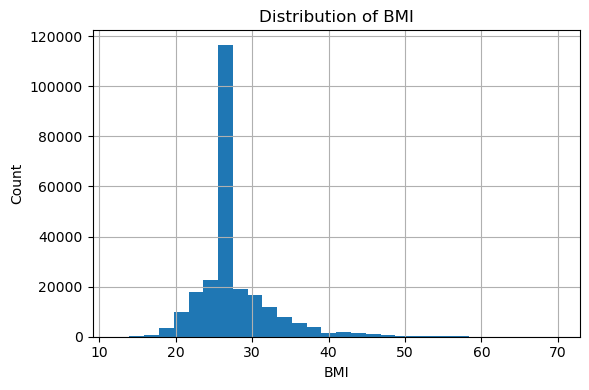

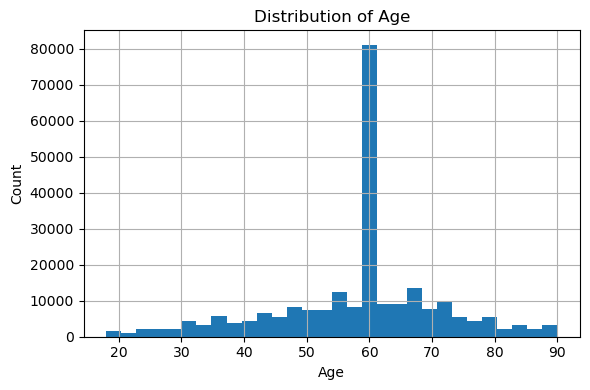

In [7]:
import matplotlib.pyplot as plt
# select features for analysis
num = ['BMI', 'Age']
cat = ['Sex', 'CholCheck'] 

# numerical features
# histogram
for n in num:
    plt.figure(figsize=(6,4))
    df_diabetes_clean[n].hist(bins=30)
    plt.title(f'Distribution of {n}')
    plt.xlabel(n); plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

<Figure size 600x400 with 0 Axes>

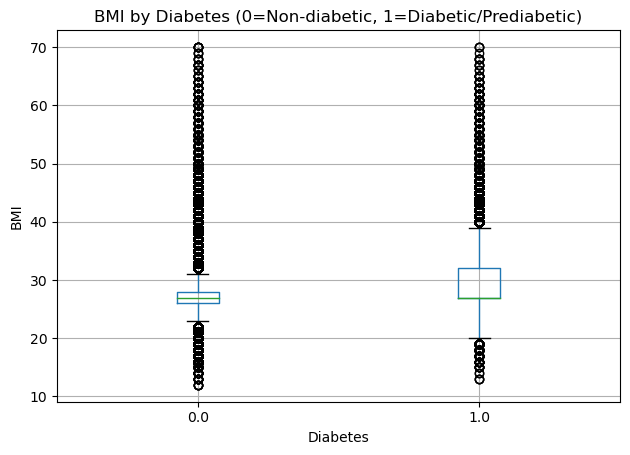

<Figure size 600x400 with 0 Axes>

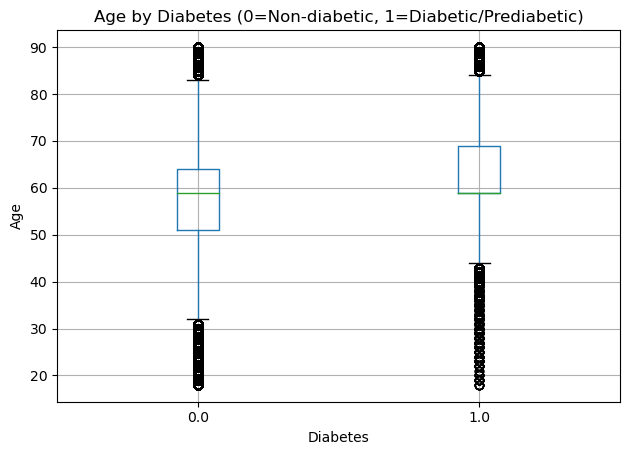

In [8]:
# boxplot
for n in num:
    plt.figure(figsize=(6,4))
    df_diabetes_clean[[n, 'Diabetes']].boxplot(by='Diabetes')
    plt.suptitle('')
    plt.title(f'{n} by Diabetes (0=Non-diabetic, 1=Diabetic/Prediabetic)')
    plt.xlabel('Diabetes'); plt.ylabel(n)
    plt.tight_layout()
    plt.show()

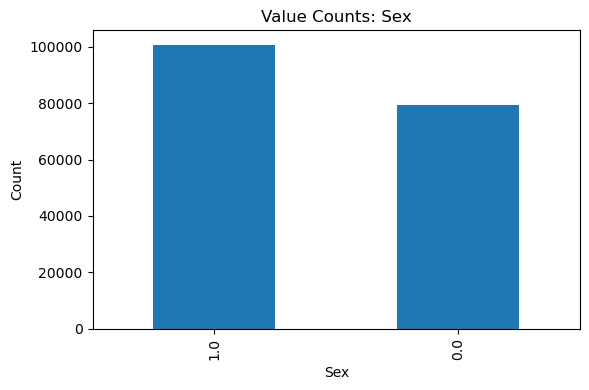

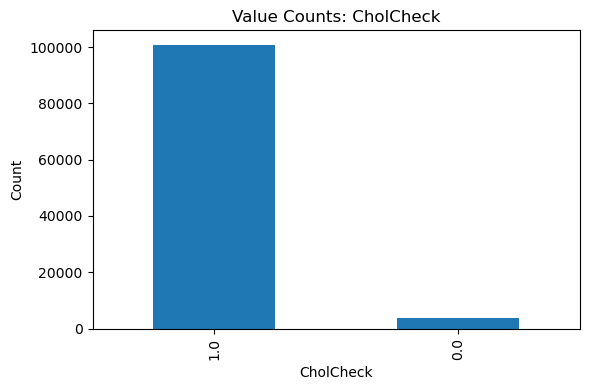

In [9]:
# categorical features
# bar chart
for c in cat:
    vc = df_diabetes_clean[c].value_counts()
    plt.figure(figsize=(6,4))
    vc.plot(kind='bar')
    plt.title(f'Value Counts: {c}')
    plt.xlabel(c); plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


Prevalence by Sex:


count  diabetes_rate
Sex                       
0.0   79406       0.169017
1.0  100802       0.147368

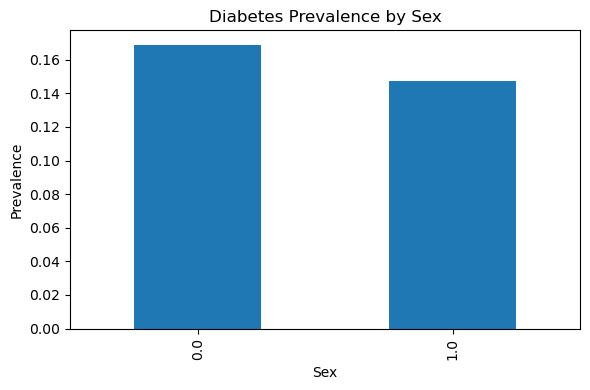


Prevalence by CholCheck:


count  diabetes_rate
CholCheck                       
0.0          3779       0.027256
1.0        100875       0.163073

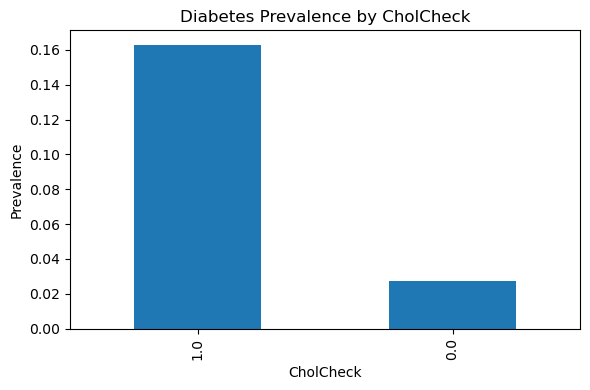

In [10]:
# Prevalence of diabetes
for c in cat:
    # Group by features and calculate the prevalence and number of people with diabetes
    df_diabetes_clean_2 = df_diabetes_clean[df_diabetes_clean['Diabetes'] != 'missing']
    rate  = df_diabetes_clean_2.groupby(c)['Diabetes'].mean().sort_values(ascending=False)
    count = df_diabetes_clean_2.groupby(c)['Diabetes'].size()

    # summary table
    summary = pd.DataFrame({'count': count, 'diabetes_rate': rate})
    print(f"\nPrevalence by {c}:")
    display(summary)

    # bar plot
    plt.figure(figsize=(6,4))
    rate.plot(kind='bar')
    plt.title(f'Diabetes Prevalence by {c}')
    plt.xlabel(c)
    plt.ylabel('Prevalence')
    plt.tight_layout()
    plt.show()

Correlation :


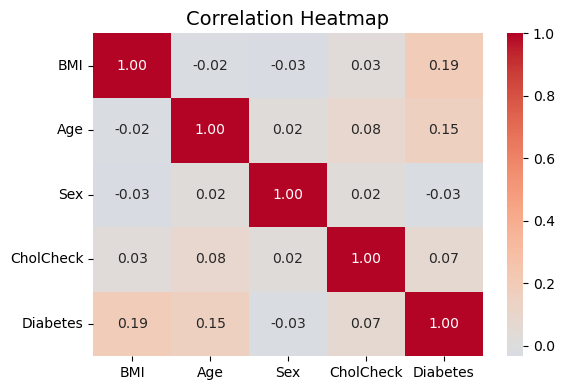

In [11]:
# the correlation with diabetes
feature = df_diabetes_clean[['BMI', 'Age', 'Sex', 'CholCheck', 'Diabetes']]
corr = feature.corr(numeric_only=True)
print("Correlation :")
# heatmap
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

In [13]:
# Save cleaned dataset
df_diabetes_clean.to_csv("diabetes_diagnosis_clean.csv", index=False)
print('Saved')

Saved
